# Findings in the Pokémon dataset
## by Hoai-Nam Nguyen

## Investigation Overview

> Give an overview what interesting stuff can be in Pokémon data.

## Dataset Overview

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

> This are the raw attributes that are used for calculating how much damage an attack will do in the games.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('datasets_121_280_Pokemon.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How are the attributes distributed?

> In this visualization we can see the distribution of the different Pokémon attributes as box plots. 
Here we can see several statistic metrics, like the min. and max. value, quantiles, outliers etc.

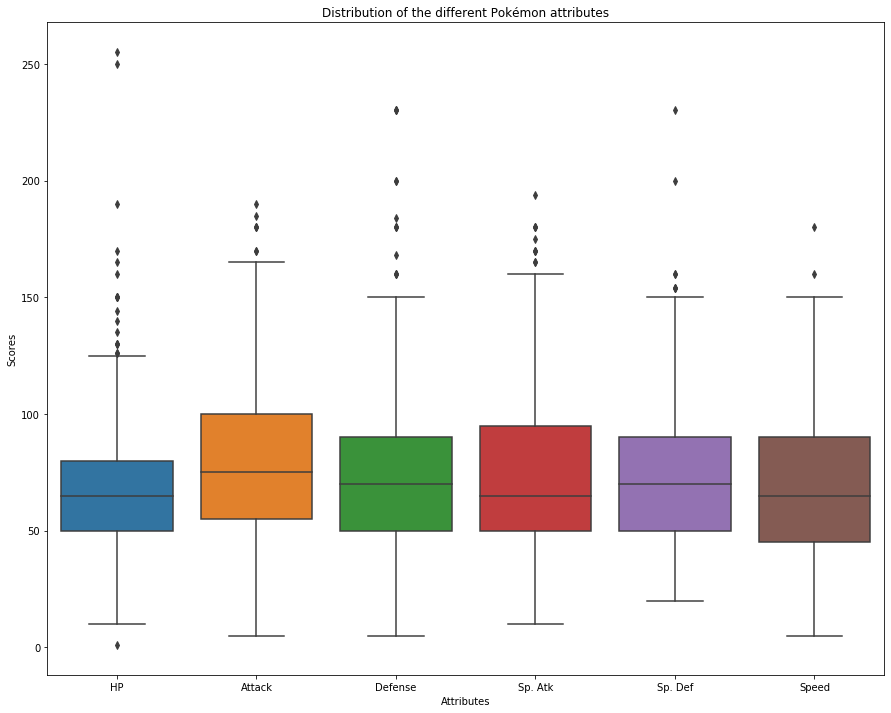

In [22]:
plt.figure(figsize=(15, 12))
plt.title('Distribution of the different Pokémon attributes')
plt.ylabel('Scores')
plt.xlabel('Attributes')
sns.boxplot(data = df.drop(columns=['#', 'Total', 'Generation', 'Legendary'], axis=1));

## How is the distribution for the Total score (sum of the attributes)

> Here we can see the distribution of the Total scores (sum of attributes) for the dataset. The peak at around 500 means that very many Pokémon in the dataset have a Total score of the bin at around 500.

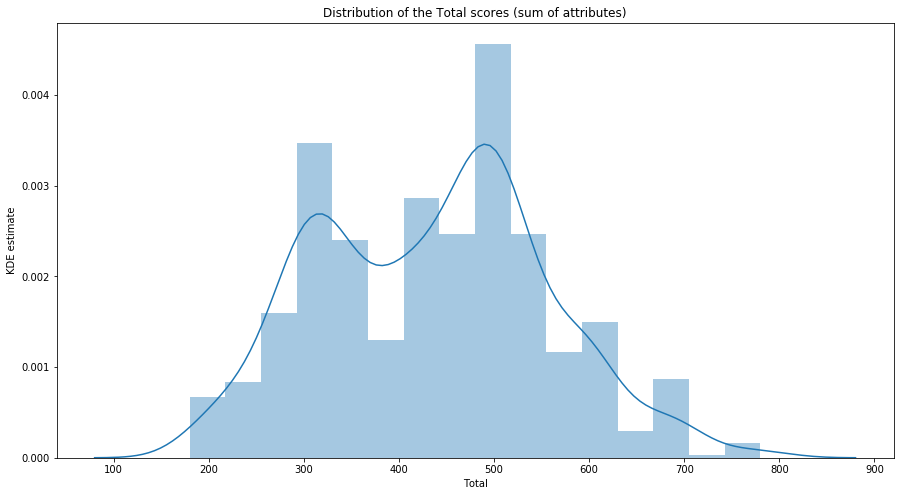

In [21]:
plt.figure(figsize=(15, 8))
plt.title('Distribution of the Total scores (sum of attributes)')

sns.distplot(df['Total'])
plt.ylabel('KDE estimate');

## Are there any correlations between the numerical attributes?

> Here we can see a pairplot between each numerical variable of the dataset. This helps us see possible relationships between the variables, like Attack and Defense have.

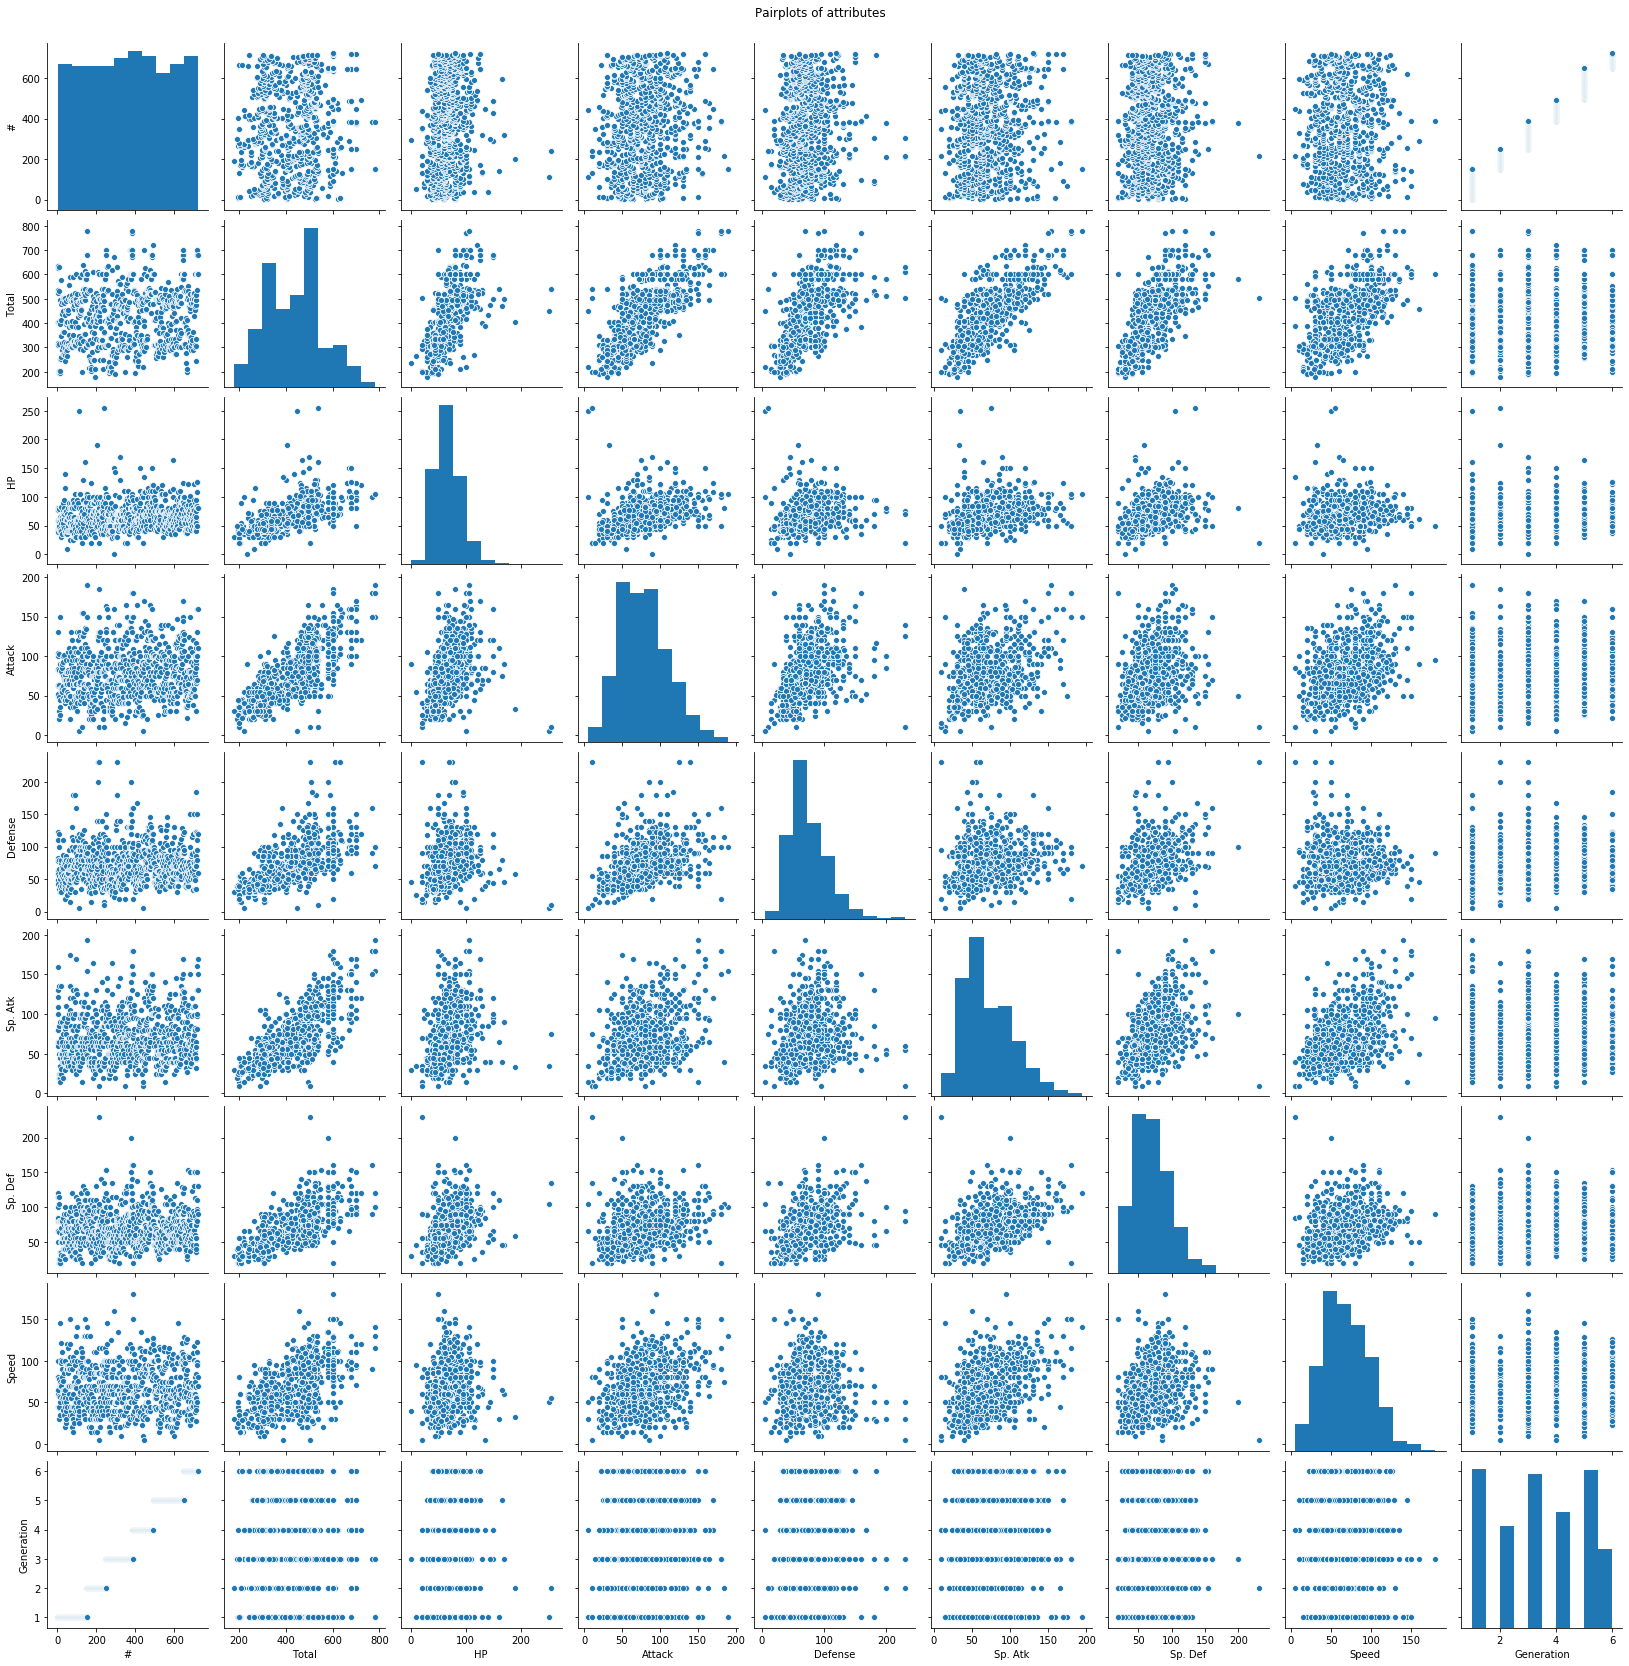

In [27]:
df_bi = df.copy()
df_bi['Legendary'] = df_bi['Legendary'].apply(lambda x: 'Legendary' if x == True else 'Not Legendary')
chart = sns.pairplot(df_bi)
chart.fig.suptitle('Pairplots of attributes', y=1.02);

## How do the attributes evolve over the Generations?

> Here we can see the evolution of the average attributes over the Generations.

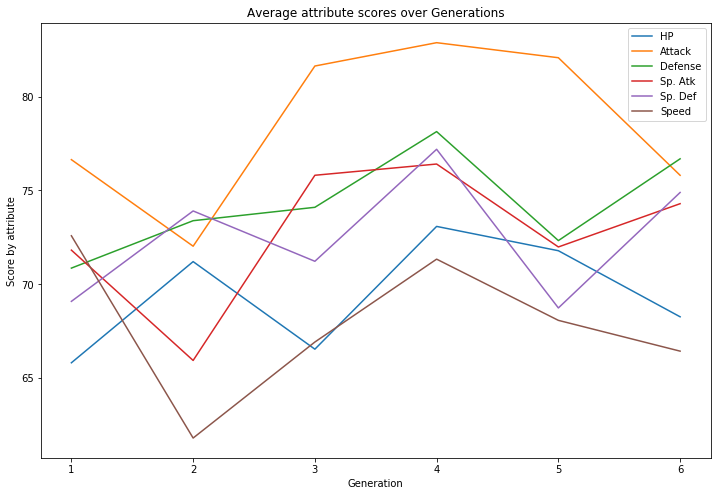

In [6]:
avg_attributes = df_bi.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
ax = avg_attributes.plot(figsize=(12, 8), kind='line', title='Average attribute scores over Generations')
ax.set_ylabel('Score by attribute');

## What are the top 20 Pokémon and are they legendary or not?

> Here we can see the top 20 Pokémon by Total score. Additionally we can see if the Pokémon are legendary or not.

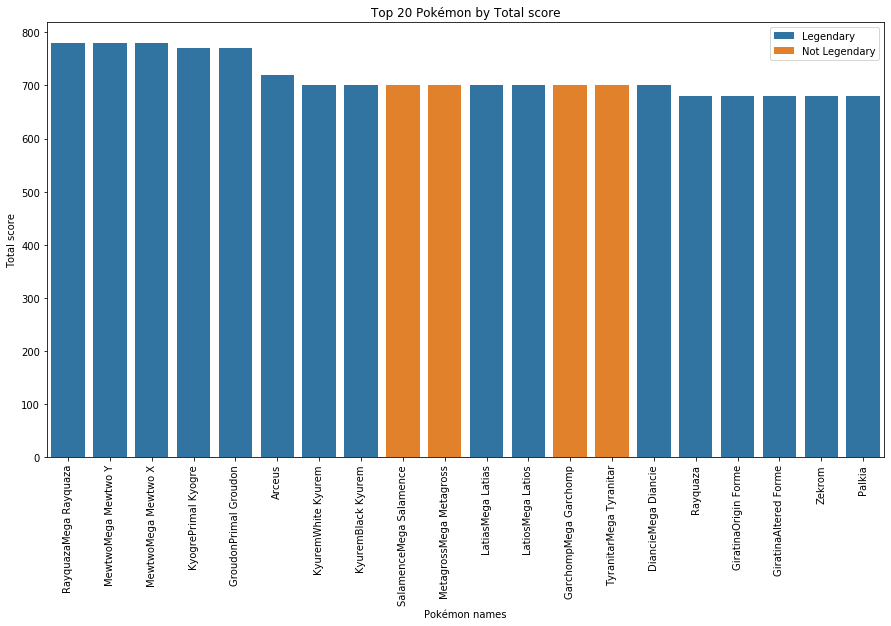

In [7]:
plt.figure(figsize=(15, 8))
plt.title('Top 20 Pokémon by Total score')
plt.ylabel('Total score')
plt.xlabel('Pokémon names')
chart = sns.barplot(x=df_bi.sort_values('Total', ascending=False)[:20]['Name'].values, y=df_bi.sort_values('Total', ascending=False)[:20]['Total'].values, hue=df_bi.sort_values('Total', ascending=False)[:20]['Legendary'].values, dodge=False)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90) ;

## How are primary and secondary types set up?

> Here we can see a Heatmap showing the relationship between primary and secondary Pokémon types.

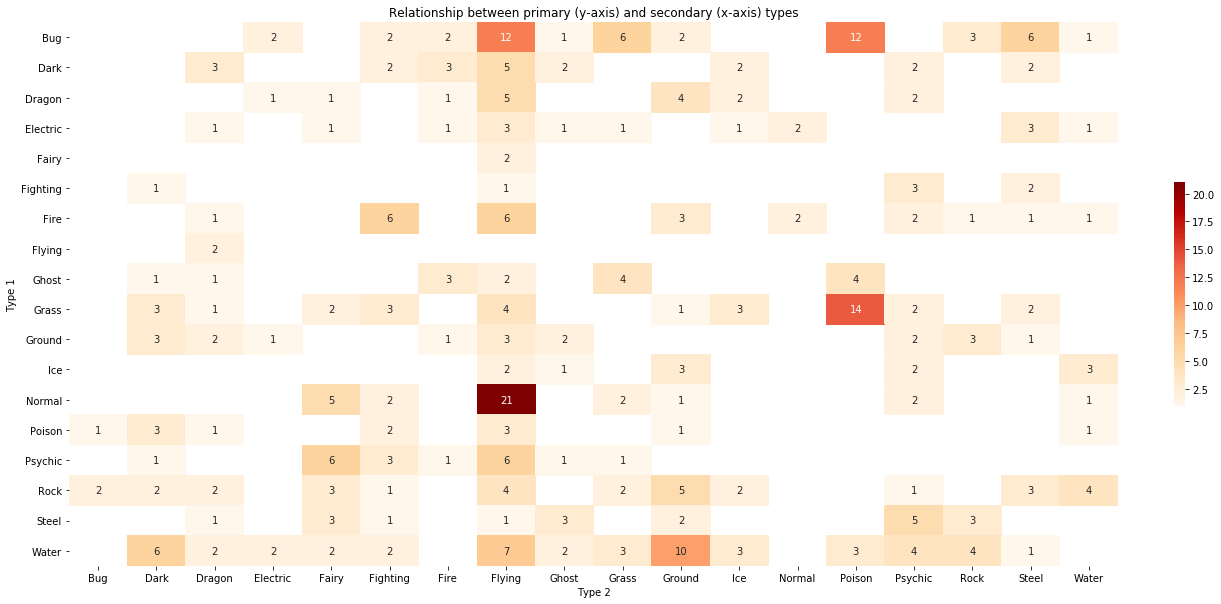

In [8]:
df_heatmap = df_bi.pivot_table(values='Total', index='Type 1',columns='Type 2', aggfunc = lambda x: len(x.unique()))

fig, ax = plt.subplots(figsize=(20,10))  
plt.title('Relationship between primary (y-axis) and secondary (x-axis) types')
sns.heatmap(df_heatmap, ax=ax, cmap='OrRd', cbar_kws={'fraction' : 0.01}, annot=True);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!